# Implement a crude Molecular Dynamics code for a LJ system

let's start with 2 atoms

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
ri = 0
rj = 1.5
rij = abs(rj-ri)
rij

1.5

Energy function for atom pair by
$$ E_{LJ} = 4 \epsilon \left( \left(\frac{\sigma}{r_{ij}}\right)^{12} - \left(\frac{\sigma}{r_{ij}}\right)^{6} \right)$$

(-0.1, 0.2)

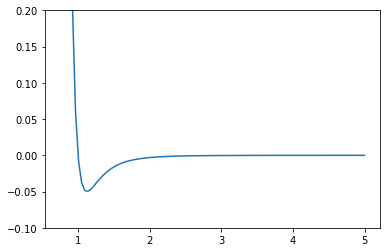

In [3]:
epsilon = 0.05
sigma = 1.0
def energy_at_rij(rij, epsilon=0.05, sigma=1.0):
    E_LJ = 4*epsilon*((sigma/rij)**12-(sigma/rij)**6)
    return E_LJ
x = np.linspace(0.75,5,100)
plt.plot(x,energy_at_rij(x))
plt.ylim(-0.1, 0.2)

The forces on atoms are given by 

$$\frac{\delta E_{LJ}}{\delta r_i} = \frac{\delta E_{LJ}}{\delta r_{ij}} \cdot \frac{\delta r_{ij}}{\delta r_i} \qquad \text{and} \qquad \frac{\delta E_{LJ}}{\delta r_j}  = \frac{\delta E_{LJ}}{\delta r_{ij}} \cdot \frac{\delta r_{ij}}{\delta r_j}$$ 

In [4]:
dE_LJdrij = -4*epsilon*12*sigma**12/(rij)**13 + 4*epsilon*6*sigma**6/(rij)**7
dE_LJdrij

0.057901441552307795

In [5]:
# logic to evaluate the derivate of the absolute operator
if ri > rj: 
    drijdri = 1.0
    drijdrj = -1.0
else:
    drijdri = -1.0
    drijdrj = 1.0    

In [6]:
Fi = dE_LJdrij*drijdri
Fj = dE_LJdrij*drijdrj
print("Forces on atoms i and j are {} {} respectively.".format(Fi,Fj) )

Forces on atoms i and j are -0.057901441552307795 0.057901441552307795 respectively.


We have $$F_i = m_i \frac{d ^2 r_i}{d t^2} \qquad \text{and} \qquad F_j = m_j \frac{d ^2 r_j}{d t^2}$$
which we can integrate to get our positions and velocities at different times. 

There are a number of subtleties in the choice of integration that we will discuss. 

But a simple [Euler method](https://en.wikipedia.org/wiki/Euler_method) should get you up and running.

## Challenge

So can you run a MD simulation and plot the positions and velocities of the particles as a function of time?

In [19]:
def energy_at_rij(ri, rj, epsilon=1.0, sigma=1.0):
    rij = abs(rj-ri)
    E_LJ = 4*epsilon*((sigma/rij)**12-(sigma/rij)**6)
    return E_LJ

def calc_forces(ri,rj, epsilon=1.0, sigma=1.0):
    rij = abs(rj-ri)
    dE_LJdrij = -4*epsilon*12*sigma**12/(rij)**13 + 4*epsilon*6*sigma**6/(rij)**7
    if ri > rj: 
        print("don't cross the beams") # this shouldn't happen in 1D with a repulsive close range force.
        drijdri = -1.0
        drijdrj = 1.0
    else:
        drijdri = 1.0
        drijdrj = -1.0   
    Fi = dE_LJdrij*drijdri
    Fj = dE_LJdrij*drijdrj
    return Fi, Fj

In [43]:
# initialize our initial conditions
ri = 0
rj = 3.0
vi = 0.0
vj = -0.1
# assume m is 1 for all particles
# this assumption could make the motion quite sensitive
dt = 0.001

# set up some empty arrays to store the trjectory variables
xitraj = []
vitraj = []
xjtraj = []
vjtraj = []
rijtraj = []
Fitraj = []
Fjtraj = []
E_LJ = []
E_LJ.append(energy_at_rij(ri, rj))
xitraj.append(ri)
xjtraj.append(rj)
rijtraj.append(rj)
vitraj.append(vi)
vjtraj.append(vj)    
Fitraj.append(Fi)
Fjtraj.append(Fj)    

for step in range(5000):
    Fi, Fj = calc_forces(ri, rj)
    ri = ri + vi*dt + 0.5*Fi*dt**2
    rj = rj + vj*dt + 0.5*Fj*dt**2
    vi = vi + Fi*dt
    vj = vj + Fj*dt
    E_LJ.append(energy_at_rij(ri, rj))
    xitraj.append(ri)
    xjtraj.append(rj)
    rijtraj.append(abs(rj-ri))
    vitraj.append(vi)
    vjtraj.append(vj)
    Fitraj.append(Fi)
    Fjtraj.append(Fj)    

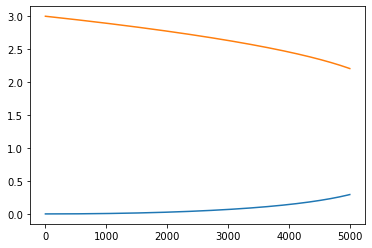

In [44]:
plt.plot(xitraj)
plt.plot(xjtraj);

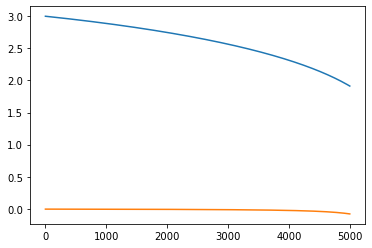

In [45]:
plt.plot(rijtraj)
plt.plot(E_LJ);

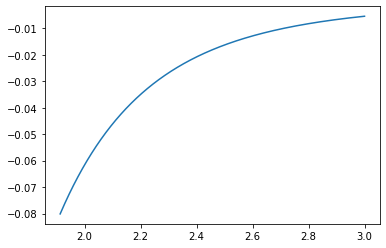

In [46]:
plt.plot(rijtraj, E_LJ)

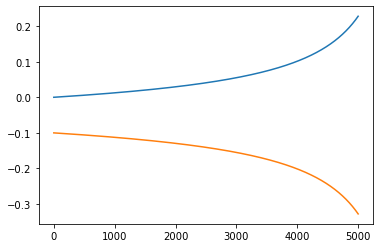

In [47]:
plt.plot(vitraj)
plt.plot(vjtraj);

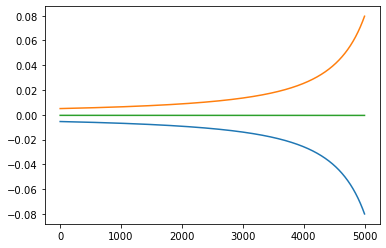

In [48]:
kE = 0.5*(np.array(vitraj)**2 + np.array(vjtraj)**2)
plt.plot(E_LJ)
plt.plot(kE)
plt.plot(E_LJ+kE)
plt.plot();